# Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [3]:
def temp_change(df, i):
    """
    takes a dataframe, df, and an index, i

    returns the average difference between the temperature in the data row and the extreme temperature in both degrees Celsius and standard deviations
    """
    lat = int(df.loc[i,'latitude'])
    long = int(df.loc[i,'longitude'])
    start_date = dt.datetime.fromisoformat(df.loc[i,'start_date'])
    end_date = dt.datetime.fromisoformat(df.loc[i,'end_date'])
    temp = df.loc[i,'temperature']
    #duration = df.loc[i,'duration']
    
    monthly_sum = pd.read_csv(f"../data/temp_events/monthly_summary_lat={lat}_long={long}.csv", index_col='month', usecols=['month', 'min_std', 'min_extreme'])
    
    
    dates = pd.date_range(start= start_date, end= end_date)
    delta_C = []
    delta_std = []
    
    for date in dates:
        delta_temp_C = temp - monthly_sum.loc[date.month, 'min_extreme']
        delta_C.append(delta_temp_C)
        
        delta_std.append(delta_temp_C / monthly_sum.loc[date.month, 'min_std'])

    return np.mean(delta_C), np.mean(delta_std)

## Location Information 

In [57]:
data = [
    {'country': 'Afghanistan', 'location': 'Kabul', 'exact_latitude': 34.555, 'exact_longitude':69.2, 'latitude': 30, 'longitude': 70}, 
    {'country': 'Poland', 'location': 'Warsaw', 'exact_latitude': 52.2, 'exact_longitude': 21.0, 'latitude': 50, 'longitude': 20}, 
    {'country': 'Peru', 'exact_latitude': -9.2, 'exact_longitude': -75, 'latitude': -10, 'longitude':-70}, 
    {'country': 'Germany',  'exact_latitude': 51, 'exact_longitude': 10.5, 'latitude': 50, 'longitude': 10}, 
    {'country': 'France', 'exact_latitude': 46.2, 'exact_longitude': 2.2, 'latitude': 50, 'longitude':0}, 
    {'country': 'South Africa', 'latitude': -30, 'longitude': 30}, 
    {'country': 'India',  'latitude': 20, 'longitude': 80}, 
    {'country': 'Romania',  'exact_latitude': 45, 'exact_longitude': 25, 'latitude': 50, 'longitude':20}, 
    {'country': 'United Kingdom of Great Britain and Northern Ireland',  'latitude': 51, 'longitude':0}, 
    {'country': 'Bangladesh',  'exact_latitude': 25, 'exact_longitude': 90, 'latitude': 30, 'longitude': 90}, 
    {'country': 'Russian Federation', 'latitude': 60, 'longitude': 30}, 
    {'country': 'Lithuania',  'exact_latitude': 55, 'exact_longitude': 24, 'latitude': 60, 'longitude': 30}, 
    {'country': 'China',  'exact_latitude': 30, 'exact_longitude': 110, 'latitude': 30, 'longitude': 110}, 
    {'country': 'Mexico', 'latitude': 20, 'longitude':-100}, 
    {'country': 'Nepal', 'exact_latitude': 28.5, 'exact_longitude': 84, 'latitude': 30, 'longitude': 80}, 
    {'country': 'Bosnia and Herzegovina',  'exact_latitude': 44, 'exact_longitude': 18, 'latitude': 40, 'longitude': 20}, 
    {'country': 'Republic of Moldova', 'exact_latitude': 47, 'exact_longitude': 29, 'latitude': 50, 'longitude':30}, 
    {'country': 'Bulgaria', 'exact_latitude': 43, 'exact_longitude': 26, 'latitude': 40, 'longitude':30}, 
    {'country': 'Switzerland', 'exact_latitude': 47, 'exact_longitude': 8, 'latitude': 50, 'longitude':10}, 
    {'country': 'Croatia', 'exact_latitude': 45, 'exact_longitude': 15, 'latitude': 40, 'longitude': 20}, 
    {'country': 'Serbia', 'exact_latitude': 44, 'exact_longitude': 21, 'latitude': 40, 'longitude': 20},
    {'country': 'Ukraine', 'exact_latitude': 50, 'exact_longitude': 30, 'latitude': 50, 'longitude': 30},
    {'country': 'Kyrgyzstan', 'exact_latitude': 41, 'exact_longitude': 75, 'latitude': 40, 'longitude': 70},
    {'country': 'Japan', 'exact_latitude': 36, 'exact_longitude': 138, 'latitude': 40, 'longitude': 140},
    {'country': 'Republic of Korea', 'exact_latitude': 36, 'exact_longitude': 127, 'latitude': 30, 'longitude':120},
    {'country': 'Thailand', 'exact_latitude': 16, 'exact_longitude': 101, 'latitude': 20, 'longitude': 100},
    {'country': 'Taiwan (Province of China)', 'exact_latitude': 24, 'exact_longitude': 121, 'latitude': 30, 'longitude': 120},
    {'country': 'Czechia', 'exact_latitude': 50, 'exact_longitude': 15, 'latitude': 50, 'longitude': 20},
    {'country': 'Estonia', 'exact_latitude': 59, 'exact_longitude': 25, 'latitude': 60, 'longitude': 30},
    {'country': 'Italy', 'exact_latitude': 42, 'exact_longitude': 13, 'latitude': 40, 'longitude': 20},
    {'country': 'Algeria', 'exact_latitude': 30, 'exact_longitude': 0, 'latitude': 30, 'longitude':0},
    {'country': 'State of Palestine',  'exact_latitude': 32, 'exact_longitude': 35, 'latitude': 30, 'longitude': 40},
    {'country': 'Mongolia', 'exact_latitude': 47, 'exact_longitude': 105, 'latitude': 50, 'longitude':100},
    {'country': 'Pakistan', 'exact_latitude': 30.4, 'exact_longitude': 69.3, 'latitude': 30, 'longitude': 70},
    {'country': 'Belgium', 'exact_latitude': 50.5, 'exact_longitude': 4.47, 'latitude': 50, 'longitude': 10},
    {'country': 'Spain', 'exact_latitude': 40.5, 'exact_longitude': 3.7, 'latitude': 40, 'longitude': 0},
    {'country': 'Netherlands (Kingdom of the)', 'exact_latitude': 52.1, 'exact_longitude': 5.3, 'latitude': 50, 'longitude': 10},
    {'country': 'Portugal', 'exact_latitude': 39.4, 'exact_longitude': -8.22, 'latitude': 40, 'longitude': 0},
    {'country': 'Canary Islands', 'exact_latitude': 28.3, 'exact_longitude': -16.6, 'latitude': 20, 'longitude': -10},
    {'country': 'Slovakia', 'exact_latitude': 48.7, 'exact_longitude': 19.7, 'latitude': 50, 'longitude': 20},
    {'country': 'Sudan', 'exact_latitude': 12.8, 'exact_longitude': 30, 'latitude': 20, 'longitude': 30},
    {'country': 'Austria', 'exact_latitude': 47, 'exact_longitude': 134, 'latitude': 50, 'longitude': 10},
    {'country': 'Albania', 'exact_latitude': 41, 'exact_longitude': 20, 'latitude': 40, 'longitude': 20},
    {'country': 'Switzerland', 'exact_latitude': 46.8, 'exact_longitude': 8, 'latitude': 50, 'longitude': 10},
    {'country': 'Cyprus', 'exact_latitude': 35, 'exact_longitude': 33, 'latitude': 40, 'longitude': 30},
    {'country': 'Denmark', 'exact_latitude': 56, 'exact_longitude': 9.5, 'latitude': 50, 'longitude': 10},
    {'country': 'Estonia', 'exact_latitude': 58.6, 'exact_longitude': 25, 'latitude': 60, 'longitude': 30},
    {'country': 'Finland', 'exact_latitude': 61.9, 'exact_longitude': 25.7, 'latitude': 60, 'longitude': 30},
    {'country': 'Greece', 'exact_latitude': 39.1, 'exact_longitude': 21.8, 'latitude': 40, 'longitude': 20},
    {'country': 'Hungary', 'exact_latitude': 47.2, 'exact_longitude': 19.5, 'latitude': 50, 'longitude': 20},
    {'country': 'Ireland', 'exact_latitude': 53.8, 'exact_longitude': -7.3, 'latitude': 51, 'longitude': 0},
    {'country': 'Lithuania', 'exact_latitude': 55.2, 'exact_longitude': 23.9, 'latitude': 50, 'longitude': 20},
    {'country': 'Luxembourg', 'exact_latitude': 49.8, 'exact_longitude': 6.1, 'latitude': 50, 'longitude': 10},
    {'country': 'Latvia', 'exact_latitude': 56.9, 'exact_longitude': 24.6, 'latitude': 50, 'longitude': 20},
    {'country': 'Malta', 'exact_latitude': 35.9, 'exact_longitude': 14.4, 'latitude': 40, 'longitude': 20},
    {'country': 'Montenegro', 'exact_latitude': 42.7, 'exact_longitude': 19.4, 'latitude': 40, 'longitude': 20},
    {'country': 'Norway', 'exact_latitude': 60.5, 'exact_longitude': 8.5, 'latitude': 60, 'longitude': 10},
    {'country': 'Poland', 'exact_latitude': 51.9, 'exact_longitude': 19.1, 'latitude': 50, 'longitude': 20},
    {'country': 'Serbia', 'exact_latitude': 44, 'exact_longitude': 21, 'latitude': 40, 'longitude': 20},
    {'country': 'Slovenia', 'exact_latitude': 46.2, 'exact_longitude': 15, 'latitude': 50, 'longitude': 20},
    {'country': 'Sweden', 'exact_latitude': 60.1, 'exact_longitude': 18.6, 'latitude': 60, 'longitude': 20},
    {'country': 'Myanmar', 'exact_latitude': 21.9, 'exact_longitude': 95.95, 'latitude': 20, 'longitude': 100},
    {'country': 'Saudi Arabia', 'exact_latitude': 23.9, 'exact_longitude': 45.1, 'latitude': 20, 'longitude': 50},
    {'country': 'Morocco', 'exact_latitude': 31.8, 'exact_longitude': -7.1, 'latitude': 30, 'longitude': 0},
    {'country': 'United State of America', 'latitude': 40, 'longitude': -100}
]

In [58]:
dataframe = pd.DataFrame(data)

In [59]:
dataframe.to_csv('../data/extreme_temp/locations_lat_long.csv', index=False)

In [60]:
dataframe_no_usa = dataframe[dataframe['country']!='United States of America']

## Heat Deaths

In [16]:
heat_deaths = pd.read_csv('../data/extreme_temp/heat_deaths_reported.csv').drop(columns= ['Unnamed: 0'])

In [17]:
heat_deaths.head()

,disaster_subtype,country,subregion,region,location,temperature,magnitude_scale,start_year,start_month,total_deaths,start_date,end_date,duration_days
0,Heat wave,India,Southern Asia,Asia,"Madhya Pradesh, Andhra Pradesh, Uttar Pradesh,...",50.0,°C,2002,5,1030.0,2002-05-10,2002-05-22,12 days
1,Heat wave,Bangladesh,Southern Asia,Asia,"Dhaka, Khulna, Rajshahi provinces",40.0,°C,2003,5,62.0,2003-05-10,2003-06-12,33 days
2,Heat wave,India,Southern Asia,Asia,"Andhra Pradesh, Orissa, Tamil Nadu, Vidarbha (...",49.0,°C,2003,5,1210.0,2003-05-14,2003-06-06,23 days
3,Heat wave,Pakistan,Southern Asia,Asia,Punjab province,50.0,°C,2003,5,200.0,2003-05-01,2003-06-06,36 days
4,Heat wave,Belgium,Western Europe,Europe,Region de Bruxelles-Capitale/Brussels Hoofdste...,NaN,°C,2003,8,1175.0,2003-08-01,2003-08-15,14 days


In [18]:
heat_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disaster_subtype  111 non-null    object 
 1   country           111 non-null    object 
 2   subregion         111 non-null    object 
 3   region            111 non-null    object 
 4   location          62 non-null     object 
 5   temperature       82 non-null     float64
 6   magnitude_scale   111 non-null    object 
 7   start_year        111 non-null    int64  
 8   start_month       111 non-null    int64  
 9   total_deaths      111 non-null    float64
 10  start_date        111 non-null    object 
 11  end_date          111 non-null    object 
 12  duration_days     111 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 11.4+ KB


In [24]:
for i in heat_deaths.index:
    heat_deaths.loc[i, 'duration'] = (heat_deaths.loc[i,'duration_days'].split(' ')[0])

In [25]:
heat_deaths = heat_deaths.dropna(subset=['temperature'])

In [26]:
heat_deaths_no_usa = heat_deaths[heat_deaths['country']!='United States of America']

In [61]:
df_hot = pd.merge(left= heat_deaths.drop(columns=['disaster_subtype', 'magnitude_scale']), right= dataframe.drop(columns=['location','exact_latitude', 'exact_longitude']), how= 'left', on='country')

In [62]:
df_hot = df_hot.reset_index(drop=True)

In [63]:
delta_temps = []

for i in df_hot.index:
    try:
        delta_C, delta_std = temp_change(df_hot,i)
        delta_temps.append({'delta_temp_C': delta_C, 'delta_temp_std': delta_std})
    except:
        pass

In [64]:
hot_df = pd.merge(left= df_hot, right= pd.DataFrame(delta_temps), left_index=True, right_index=True)

In [356]:
hot_df['duration']= pd.to_numeric(hot_df['duration'])

In [357]:
hot_df[hot_df['duration']>95]

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
50,Austria,Western Europe,Europe,NaN,36.3,2022,5,419.0,2022-05-30,2022-09-04,97 days,97,50.0,10.0,30.047528,16.607264
51,Belgium,Western Europe,Europe,NaN,40.0,2022,5,434.0,2022-05-30,2022-09-04,97 days,97,50.0,10.0,31.466906,12.278616
52,Switzerland,Western Europe,Europe,NaN,38.3,2022,5,302.0,2022-05-30,2022-09-04,97 days,97,50.0,10.0,25.766981,12.145699
53,Switzerland,Western Europe,Europe,NaN,38.3,2022,5,302.0,2022-05-30,2022-09-04,97 days,97,50.0,10.0,25.766981,12.145699
54,Germany,Western Europe,Europe,NaN,40.3,2022,5,8173.0,2022-05-30,2022-09-04,97 days,97,50.0,10.0,29.166906,11.377210
55,Denmark,Northern Europe,Europe,"Abed, Stokkemarke Parish, Lolland, Copenhagen,...",35.9,2022,5,252.0,2022-05-30,2022-09-04,97 days,97,50.0,10.0,32.766906,12.788106
56,Spain,Southern Europe,Europe,NaN,43.2,2022,5,11324.0,2022-05-30,2022-09-04,97 days,97,40.0,0.0,58.743379,16.254654
57,Finland,Northern Europe,Europe,NaN,32.5,2022,5,225.0,2022-05-30,2022-09-04,97 days,97,60.0,30.0,28.402373,14.939936
58,France,Western Europe,Europe,NaN,42.0,2022,5,4807.0,2022-05-30,2022-09-04,97 days,97,50.0,0.0,40.028577,25.951963
59,United Kingdom of Great Britain and Northern I...,Northern Europe,Europe,NaN,40.3,2022,5,3469.0,2022-05-30,2022-09-04,97 days,97,51.0,0.0,30.588918,14.169654


In [358]:
hot_df.to_csv('../data/hot_final_dataset.csv')

## Cold Deaths

In [41]:
cold_deaths = pd.read_csv('../data/extreme_temp/cold_deaths_reported.csv').drop(columns= ['Unnamed: 0'])

In [42]:
cold_deaths.head()

,disaster_subtype,country,subregion,region,location,temperature,magnitude_scale,start_year,start_month,total_deaths,start_date,end_date,duration_days
0,Cold wave,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.0,°C,2001,1,150.0,2001-01-31,2001-02-20,20 days
1,Cold wave,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,°C,2001,10,270.0,2001-10-10,2002-01-20,102 days
2,Cold wave,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.0,°C,2003,7,339.0,2003-07-07,2003-08-15,39 days
3,Cold wave,United States of America,Northern America,Americas,"Connecticut, Delaware, Maryland, Maine, New Ha...",NaN,°C,2004,1,3.0,2004-01-09,2004-01-12,3 days
4,Cold wave,Germany,Western Europe,Europe,Nordrhein-Westfalen province,NaN,°C,2005,11,1.0,2005-11-25,2005-11-27,2 days


In [43]:
cold_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   disaster_subtype  75 non-null     object 
 1   country           75 non-null     object 
 2   subregion         75 non-null     object 
 3   region            75 non-null     object 
 4   location          67 non-null     object 
 5   temperature       36 non-null     float64
 6   magnitude_scale   75 non-null     object 
 7   start_year        75 non-null     int64  
 8   start_month       75 non-null     int64  
 9   total_deaths      75 non-null     float64
 10  start_date        75 non-null     object 
 11  end_date          75 non-null     object 
 12  duration_days     75 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.7+ KB


In [44]:
for i in cold_deaths.index:
    cold_deaths.loc[i, 'duration'] = (cold_deaths.loc[i,'duration_days'].split(' ')[0])

In [45]:
df_cold = pd.merge(left= cold_deaths.drop(columns=['disaster_subtype', 'magnitude_scale']), right= dataframe.drop(columns=['location','exact_latitude', 'exact_longitude']), how= 'left', on='country')

In [46]:
df_cold

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.0,2001,1,150.0,2001-01-31,2001-02-20,20 days,20,30.0,70.0
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.0,2003,7,339.0,2003-07-07,2003-08-15,39 days,39,-10.0,-70.0
4,United States of America,Northern America,Americas,"Connecticut, Delaware, Maryland, Maine, New Ha...",NaN,2004,1,3.0,2004-01-09,2004-01-12,3 days,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Romania,Eastern Europe,Europe,NaN,NaN,2018,2,2.0,2018-02-23,2018-02-28,5 days,5,50.0,20.0
86,Algeria,Northern Africa,Africa,"Tizi Ouzou, Medea, Setif, Bourdj Bouriridj, Ba...",NaN,2019,1,8.0,2019-01-11,2019-03-22,70 days,70,30.0,0.0
87,State of Palestine,Western Asia,Asia,West Bank and Gaza Strip,0.0,2020,1,3.0,2020-01-18,2020-02-05,18 days,18,30.0,40.0
88,Afghanistan,Southern Asia,Asia,"Ghor, Baghlan, Sar-e-Pul, Faryab, Takhar, Kand...",-33.0,2023,1,166.0,2023-01-09,2023-01-23,14 days,14,30.0,70.0


In [48]:
df_cold[df_cold['start_year']<2020].dropna(subset=['temperature'])

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.0,2001,1,150.0,2001-01-31,2001-02-20,20 days,20,30.0,70.0
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.0,2003,7,339.0,2003-07-07,2003-08-15,39 days,39,-10.0,-70.0
7,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.0,2007,5,22.0,2007-05-21,2007-05-27,6 days,6,-30.0,30.0
10,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0
11,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0
12,Romania,Eastern Europe,Europe,"Alba, Arad, Bihor, Bistrita-nasaud, Brasov, Bu...",-31.0,2009,1,43.0,2009-01-01,2009-01-15,14 days,14,50.0,20.0
14,Germany,Western Europe,Europe,"Bayern, Berlin, Hamburg provinces, Leipzig dis...",-33.6,2009,12,14.0,2009-12-18,2010-01-25,38 days,38,50.0,10.0
16,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-35.0,2009,11,298.0,2009-11-01,2010-01-26,86 days,86,50.0,20.0


In [49]:
df_cold[df_cold['start_year']>=2020]

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude
87,State of Palestine,Western Asia,Asia,West Bank and Gaza Strip,0.0,2020,1,3.0,2020-01-18,2020-02-05,18 days,18,30.0,40.0
88,Afghanistan,Southern Asia,Asia,"Ghor, Baghlan, Sar-e-Pul, Faryab, Takhar, Kand...",-33.0,2023,1,166.0,2023-01-09,2023-01-23,14 days,14,30.0,70.0
89,Mongolia,Eastern Asia,Asia,"Dornod, Dornogovi, Dundgovi, Govi-Altai, Khent...",NaN,2023,5,2.0,2023-05-19,2023-05-22,3 days,3,50.0,100.0


In [50]:
np.mean([-5.9440, -5.3286,0.0471, 2.3412])

-2.221075

In [51]:
df_cold.loc[71,'temperature'] = -2.22

In [67]:
df_cold = df_cold.dropna(subset=['temperature','latitude','longitude'])

In [68]:
df_cold.dtypes

country           object
subregion         object
region            object
location          object
temperature      float64
start_year         int64
start_month        int64
total_deaths     float64
start_date        object
end_date          object
duration_days     object
duration          object
latitude         float64
longitude        float64
dtype: object

In [69]:
df_cold.isnull().sum()

country          0
subregion        0
region           0
location         1
temperature      0
start_year       0
start_month      0
total_deaths     0
start_date       0
end_date         0
duration_days    0
duration         0
latitude         0
longitude        0
dtype: int64

In [70]:
temp_change(df_cold,71)

(-12.654009052128448, -6.4767658331666675)

In [71]:
delta_temps = []

for i in df_cold.index:
    delta_C, delta_std = temp_change(df_cold,i)
    delta_temps.append({'delta_temp_C': delta_C, 'delta_temp_std': delta_std})

In [72]:
df_cold = df_cold.reset_index(drop=True)

In [119]:
cold_df = pd.merge(left= df_cold, right= pd.DataFrame(delta_temps), left_index=True, right_index=True)

In [120]:
cold_df

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.00,2001,1,150.0,2001-01-31,2001-02-20,20 days,20,30.0,70.0,-24.856821,-8.561158
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0,-15.941674,-4.306348
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0,-15.941674,-4.306348
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.00,2003,7,339.0,2003-07-07,2003-08-15,39 days,39,-10.0,-70.0,-43.303703,-20.441972
4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.00,2007,5,22.0,2007-05-21,2007-05-27,6 days,6,-30.0,30.0,-1.690848,-0.672643
5,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0,-14.382446,-3.694790
6,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.00,2008,11,82.0,2008-11-01,2009-01-08,68 days,68,50.0,20.0,-14.382446,-3.694790
7,Romania,Eastern Europe,Europe,"Alba, Arad, Bihor, Bistrita-nasaud, Brasov, Bu...",-31.00,2009,1,43.0,2009-01-01,2009-01-15,14 days,14,50.0,20.0,-17.360192,-3.916444
8,Germany,Western Europe,Europe,"Bayern, Berlin, Hamburg provinces, Leipzig dis...",-33.60,2009,12,14.0,2009-12-18,2010-01-25,38 days,38,50.0,10.0,-24.188667,-6.483161
9,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-35.00,2009,11,298.0,2009-11-01,2010-01-26,86 days,86,50.0,20.0,-23.757152,-5.926544


In [75]:
cold_df.to_csv('../data/cold_final_dataset.csv')

In [51]:
cold_df.columns

Index(['country', 'subregion', 'region', 'location', 'temperature',
       'start_year', 'start_month', 'total_deaths', 'start_date', 'end_date',
       'duration_days', 'duration', 'latitude', 'longitude', 'delta_temp_C',
       'delta_temp_std'],
      dtype='object')

## Cold Models

### Model 1
Features = duration, change in temperature (in standard deviation)

In [198]:
X = cold_df.drop(columns=[
    'country','subregion','region','start_month','start_year','location', 'start_date', 'end_date', 
    'duration_days', 'latitude', 'longitude', 'total_deaths', 'temperature', 'delta_temp_C'
])

In [199]:
y = cold_df['total_deaths']

In [200]:
X

,duration,delta_temp_std
0,20,-8.561158
1,102,-4.306348
2,102,-4.306348
3,39,-20.441972
4,6,-0.672643
5,68,-3.694790
6,68,-3.694790
7,14,-3.916444
8,38,-6.483161
9,86,-5.926544


In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=92)

In [205]:
ct = ColumnTransformer([
    ('ss', StandardScaler(), ['duration', 'delta_temp_std'])#,
    #('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['start_month'])
], remainder='passthrough')

In [206]:
pipe_cold = Pipeline([
    ('ct', ct),
    ('lr', LinearRegression())
])

In [207]:
pipe_cold.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['duration',
                                                   'delta_temp_std'])])),
                ('lr', LinearRegression())])

In [208]:
pipe_cold.score(X_train, y_train)

0.6347963093707305

In [209]:
pipe_cold.score(X_test, y_test)

0.565563846761736

The $R^2$ scores are similar for both the training and testing sets.  So this is a reasonable model.  I'm going to use the entire data set to train the model.

In [210]:
pipe_cold.fit(X,y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['duration',
                                                   'delta_temp_std'])])),
                ('lr', LinearRegression())])

In [211]:
pipe_cold.score(X,y)

0.6221138289057124

In [212]:
preds = pipe_cold.predict(X)

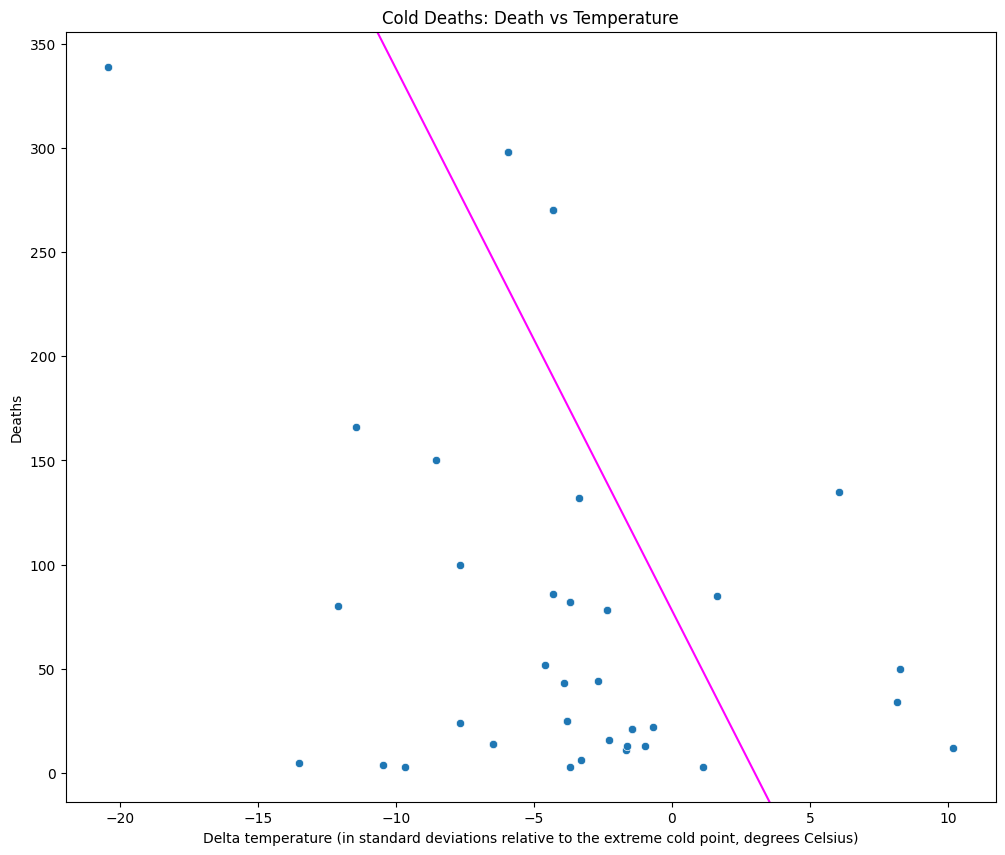

In [262]:
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x=X['delta_temp_std'], y=y)

ax.axline(xy1=(0,78), slope = -26, color= 'magenta')
ax.set_xlabel('Delta temperature (in standard deviations relative to the extreme cold point, degrees Celsius)')
ax.set_ylabel('Deaths')
ax.set_title('Cold Deaths: Death vs Temperature');

plt.savefig('../assets/images/cold_deaths_simple_linear.jpg')

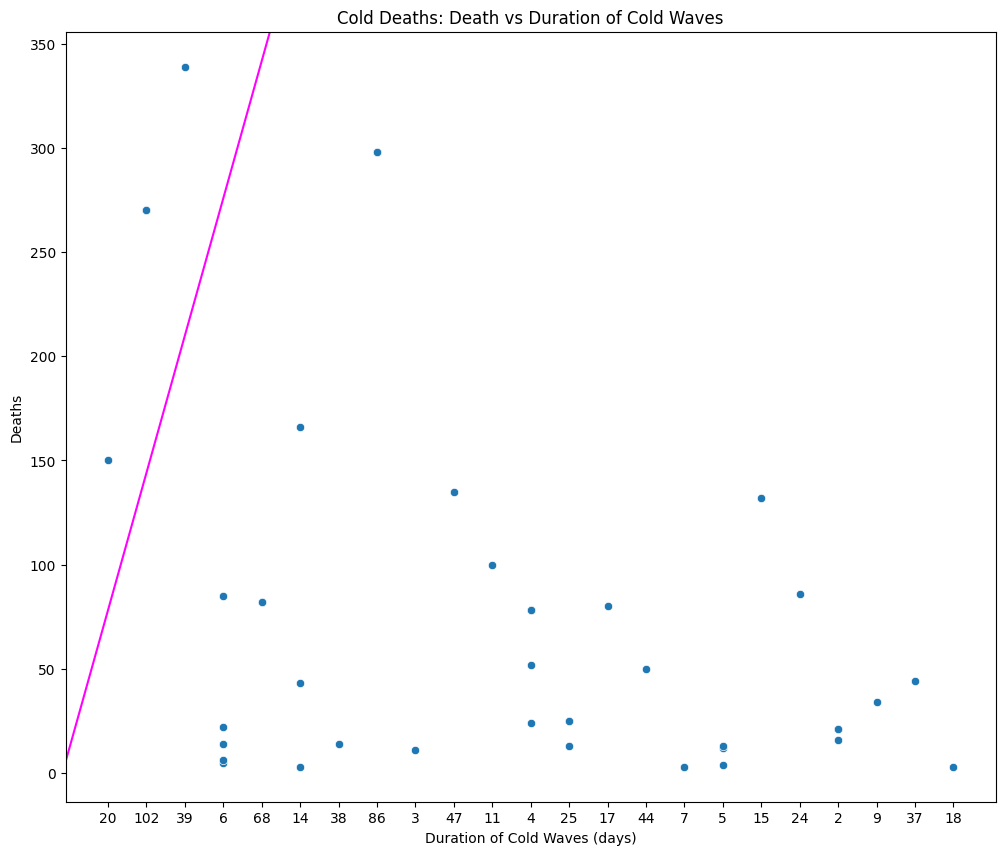

In [264]:
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x=X['duration'], y=y)

ax.axline(xy1=(0,78), slope = 65.9, color= 'magenta')
ax.set_xlabel('Duration of Cold Waves (days)')
ax.set_ylabel('Deaths')
ax.set_title('Cold Deaths: Death vs Duration of Cold Waves');

plt.savefig('../assets/images/cold_deaths_simple_linear.jpg')

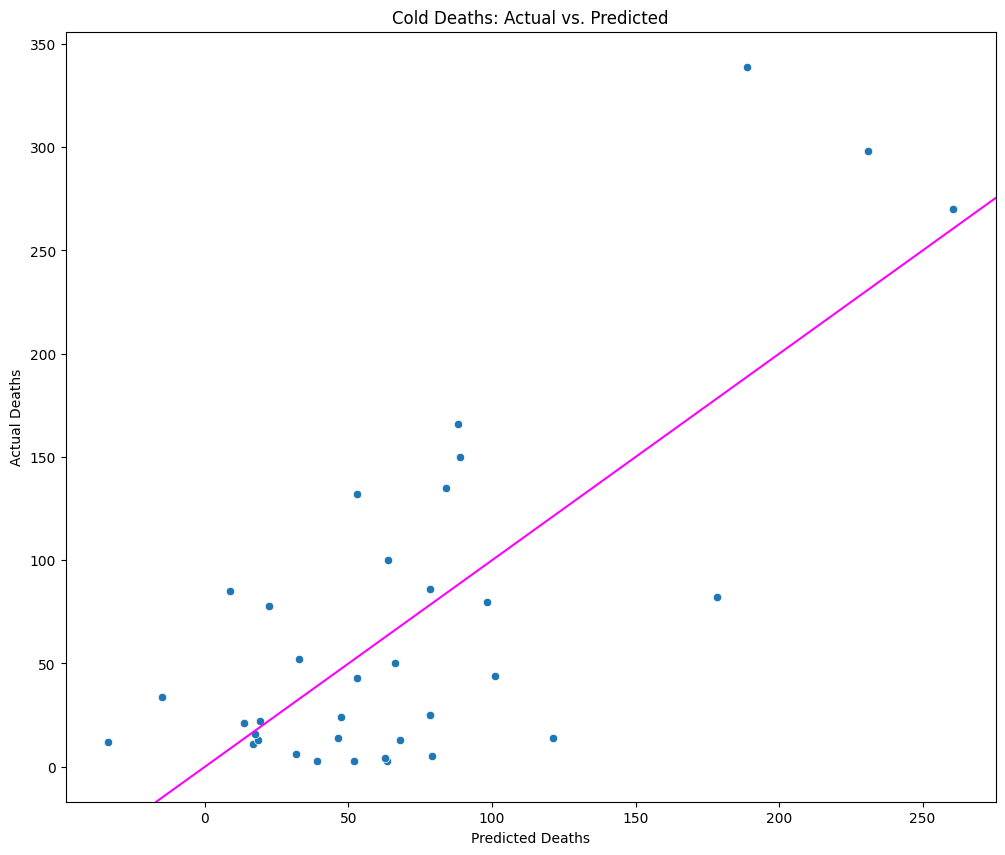

In [213]:
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x=preds, y=y)

ax.axline(xy1=(0,0), slope = 1, color= 'magenta')
ax.set_xlabel('Predicted Deaths')
ax.set_ylabel('Actual Deaths')
ax.set_title('Cold Deaths: Actual vs. Predicted');

plt.savefig('../assets/images/cold_deaths_prediction_linear.jpg')

In [258]:
coefs_cold = pipe_cold.named_steps['lr'].coef_
intercept_cold = pipe_cold.named_steps['lr'].intercept_

In [259]:
pd.DataFrame(coefs_cold, index=pipe_cold.named_steps['ct'].get_feature_names_out(), columns=['coefficients'])

,coefficients
ss__duration,65.913352
ss__delta_temp_std,-26.652091


In [260]:
intercept_cold

78.21951219512195

### Estimating Deaths

In [278]:
cold_waves = pd.read_csv('../data/extreme_temp/cold_waves.csv').drop(columns='Unnamed: 0')

cold_waves['date'] = pd.to_datetime(cold_waves['date'])

In [279]:
cold_waves['event_label'] = (cold_waves.groupby(by=['latitude', 'longitude'])['date'].diff() != pd.Timedelta(days = 1)).cumsum()

In [280]:
cold_waves['duration'] = cold_waves.groupby(by='event_label')['date'].transform('count')

In [281]:
indices_keep = []
for event in cold_waves['event_label'].unique():
    indices_keep.append(cold_waves[cold_waves['event_label']==event].index[0])

In [282]:
cold_events = cold_waves.iloc[indices_keep].reset_index(drop=True)

In [283]:
cold_events.columns

Index(['date', 'temp_max', 'temp_min', 'latitude', 'longitude', 'country',
       'region', 'city', 'notes', 'min_mean', 'min_std', 'min_extreme',
       'std_below_extreme', 'event_label', 'duration'],
      dtype='object')

In [284]:
cold_events['std_below_extreme'] = cold_events['std_below_extreme']*(-1)

In [285]:
cold_events = cold_events.rename(columns={'std_below_extreme': 'delta_temp_std'})

In [286]:
cold_events

,date,temp_max,temp_min,latitude,longitude,country,region,city,notes,min_mean,min_std,min_extreme,delta_temp_std,event_label,duration
0,2021-02-21,-22.45165,-31.61204,50,60,Kazakhstan,NaN,Aktobe,NaN,-13.182437,6.962362,-30.588342,-0.147033,1,2
1,2021-02-25,-21.70254,-31.47707,50,60,Kazakhstan,NaN,Aktobe,NaN,-13.182437,6.962362,-30.588342,-0.127647,2,2
2,2021-03-13,-11.63486,-24.28841,50,60,Kazakhstan,NaN,Aktobe,NaN,-7.996859,6.382087,-23.952077,-0.052700,3,2
3,2021-04-01,0.40300,-11.17585,50,60,Kazakhstan,NaN,Aktobe,NaN,2.804755,4.693064,-8.927905,-0.478993,4,2
4,2023-01-09,-26.10041,-34.95376,50,60,Kazakhstan,NaN,Aktobe,NaN,-14.891543,7.297432,-33.135124,-0.249216,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2024-11-20,-9.28544,-29.60023,30,90,"Tibet (Bhutan, Bangladash)",NaN,NaN,NaN,-17.001140,4.660195,-28.651627,-0.203554,965,2
965,2025-07-04,6.65157,-6.00065,30,90,"Tibet (Bhutan, Bangladash)",NaN,NaN,NaN,-0.739698,1.672971,-4.922126,-0.644676,966,3
966,2020-02-26,24.13778,12.27530,-20,30,Zimbabwe,NaN,Harare,NaN,17.735753,1.777715,13.291464,-0.571612,967,2
967,2022-04-29,20.91152,8.61123,-20,30,Zimbabwe,NaN,Harare,NaN,14.816893,2.126911,9.499616,-0.417688,968,2


In [287]:
cold_events.to_csv('../data/extreme_temp/cold_events.csv')

In [288]:
X_unk = cold_events[['duration','delta_temp_std']]

In [289]:
X_unk

,duration,delta_temp_std
0,2,-0.147033
1,2,-0.127647
2,2,-0.052700
3,2,-0.478993
4,2,-0.249216
...,...,...
964,2,-0.203554
965,3,-0.644676
966,2,-0.571612
967,2,-0.417688


In [295]:
preds = pipe_cold.predict(X_unk)

cold_predictions = pd.merge(left= cold_events, right=pd.DataFrame(preds, columns=['predicted_deaths']), left_index=True, right_index=True)

In [306]:
preds.sum()

9534.611860336543

Predicts 9,500 deaths

In [296]:
cold_predictions.to_csv('../data/model_predictions/cold_predictions.csv')

In [307]:
cold_predictions

,date,temp_max,temp_min,latitude,longitude,country,region,city,notes,min_mean,min_std,min_extreme,delta_temp_std,event_label,duration,predicted_deaths
0,2021-02-21,-22.45165,-31.61204,50,60,Kazakhstan,NaN,Aktobe,NaN,-13.182437,6.962362,-30.588342,-0.147033,1,2,7.449756
1,2021-02-25,-21.70254,-31.47707,50,60,Kazakhstan,NaN,Aktobe,NaN,-13.182437,6.962362,-30.588342,-0.127647,2,2,7.359303
2,2021-03-13,-11.63486,-24.28841,50,60,Kazakhstan,NaN,Aktobe,NaN,-7.996859,6.382087,-23.952077,-0.052700,3,2,7.009598
3,2021-04-01,0.40300,-11.17585,50,60,Kazakhstan,NaN,Aktobe,NaN,2.804755,4.693064,-8.927905,-0.478993,4,2,8.998672
4,2023-01-09,-26.10041,-34.95376,50,60,Kazakhstan,NaN,Aktobe,NaN,-14.891543,7.297432,-33.135124,-0.249216,5,2,7.926538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2024-11-20,-9.28544,-29.60023,30,90,"Tibet (Bhutan, Bangladash)",NaN,NaN,NaN,-17.001140,4.660195,-28.651627,-0.203554,965,2,7.713482
965,2025-07-04,6.65157,-6.00065,30,90,"Tibet (Bhutan, Bangladash)",NaN,NaN,NaN,-0.739698,1.672971,-4.922126,-0.644676,966,3,12.110346
966,2020-02-26,24.13778,12.27530,-20,30,Zimbabwe,NaN,Harare,NaN,17.735753,1.777715,13.291464,-0.571612,967,2,9.430831
967,2022-04-29,20.91152,8.61123,-20,30,Zimbabwe,NaN,Harare,NaN,14.816893,2.126911,9.499616,-0.417688,968,2,8.712626


## Model Heat Deaths

In [297]:
Z = hot_df.drop(columns=[
    'country','subregion','region','start_year','location', 'start_date', 'end_date', 
    'duration_days', 'latitude', 'longitude', 'total_deaths', 'temperature', 'start_month', 'delta_temp_C'
])

In [359]:
Z

,duration,delta_temp_std
0,12,13.398198
1,33,16.904774
2,23,12.736790
3,36,13.309940
4,3,6.781608
...,...,...
59,97,14.169654
60,97,14.725347
61,97,13.529711
62,97,11.799451


In [360]:
w = hot_df['total_deaths']

In [362]:
Z_train, Z_test, w_train, w_test = train_test_split(Z, w, random_state=92)

In [363]:
ct = ColumnTransformer([
    ('ss', StandardScaler(), ['duration', 'delta_temp_std'])#,
    #('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['start_month'])
], remainder='passthrough')

In [364]:
pipe_hot = Pipeline([
    ('ct', ct),
    ('lr', LinearRegression())
])

In [365]:
pipe_hot.fit(Z_train, w_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['duration',
                                                   'delta_temp_std'])])),
                ('lr', LinearRegression())])

In [366]:
pipe_hot.score(Z_train, w_train)

0.03889221875310178

In [367]:
pipe_hot.score(Z_test, w_test)

-0.0017743351179737576

The $R^2$ scores are similar for both the training and testing sets.  But approximately 0, so it doesn't explain the differences in the data.  

In [368]:
pipe_hot.fit(Z,w)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['duration',
                                                   'delta_temp_std'])])),
                ('lr', LinearRegression())])

In [369]:
pipe_hot.score(Z,w)

0.031175911358302333

In [370]:
coefs_hot = pipe_hot.named_steps['lr'].coef_
intercept_hot = pipe_hot.named_steps['lr'].intercept_

In [371]:
pd.DataFrame(coefs_hot, index=pipe_hot.named_steps['ct'].get_feature_names_out(), columns=['coefficients'])

,coefficients
ss__duration,455.258409
ss__delta_temp_std,328.507470


In [372]:
intercept_hot

1369.484375

In [373]:
preds_hot = pipe_hot.predict(Z)

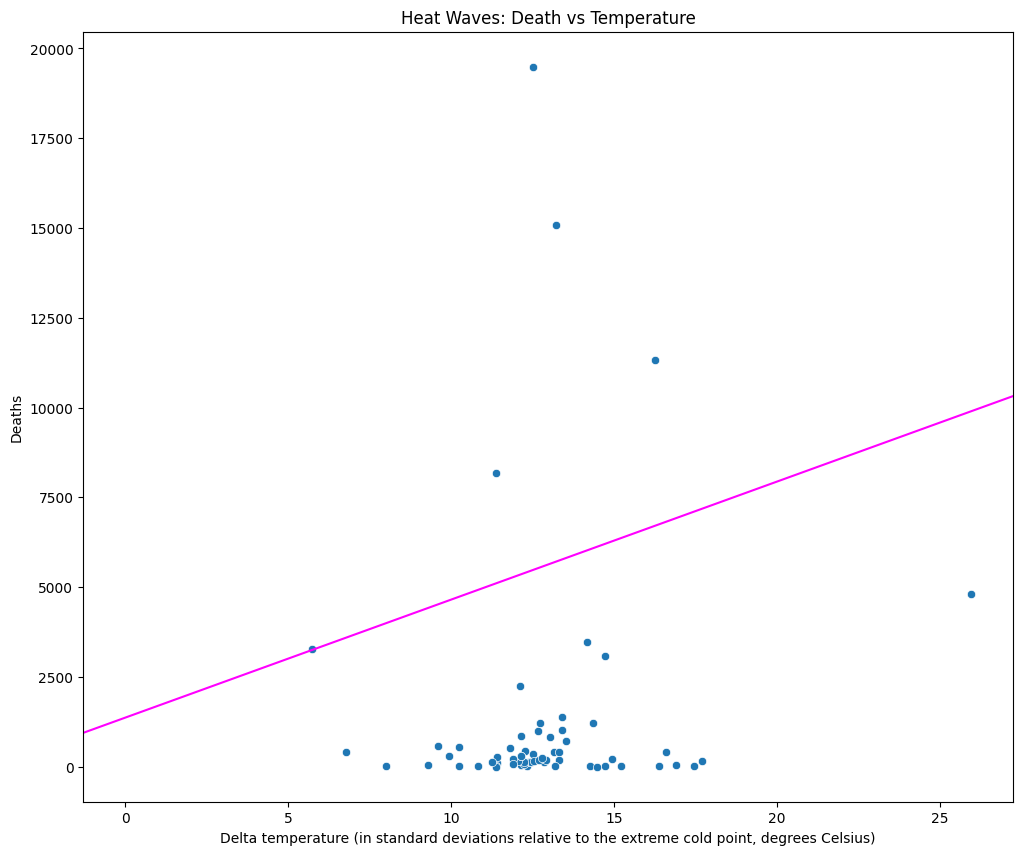

In [331]:
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x=Z['delta_temp_std'], y=w)

ax.axline(xy1=(0,1369.5), slope = 328.5, color= 'magenta')
ax.set_xlabel('Delta temperature (in standard deviations relative to the extreme cold point, degrees Celsius)')
ax.set_ylabel('Deaths')
ax.set_title('Heat Waves: Death vs Temperature');

plt.savefig('../assets/images/heat_deaths_vs_temp_linear.jpg')

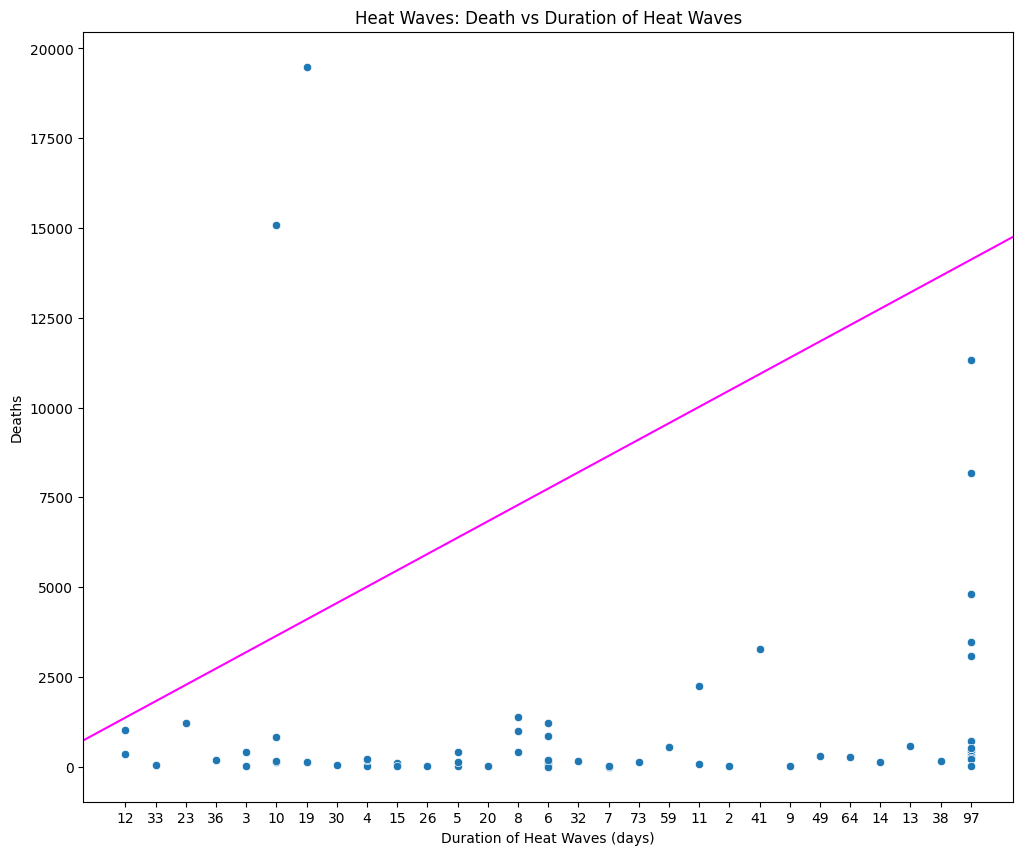

In [374]:
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x=Z['duration'], y=w)

ax.axline(xy1=(0,1369.5), slope = 455.3, color= 'magenta')
ax.set_xlabel('Duration of Heat Waves (days)')
ax.set_ylabel('Deaths')
ax.set_title('Heat Waves: Death vs Duration of Heat Waves');

plt.savefig('../assets/images/heat_deaths_vs_duration_linear.jpg')

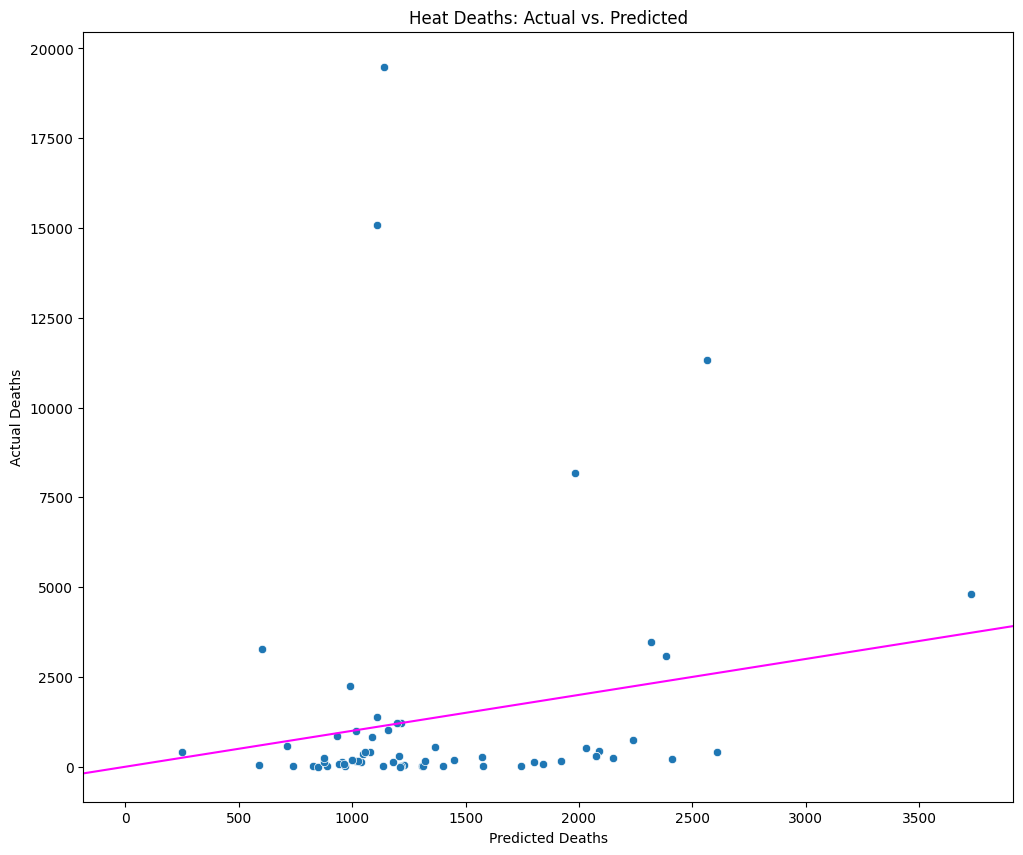

In [375]:
fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(x=pipe_hot.predict(Z), y=w)

ax.axline(xy1=(0,0), slope = 1, color= 'magenta')
ax.set_xlabel('Predicted Deaths')
ax.set_ylabel('Actual Deaths')
ax.set_title('Heat Deaths: Actual vs. Predicted');

plt.savefig('../assets/images/heat_deaths_prediction_linear.jpg')

## Temperature Data

In [396]:
heat_waves = pd.read_csv('../data/extreme_temp/heat_waves.csv').drop(columns='Unnamed: 0')

heat_waves['date'] = pd.to_datetime(heat_waves['date'])

In [397]:
heat_waves

,date,temp_max,temp_min,latitude,longitude,country,region,city,notes,max_mean,max_std,max_extreme,std_above_extreme
0,2022-09-01,34.90664,18.79586,50,60,Kazakhstan,NaN,Aktobe,NaN,19.870005,5.656088,34.010225,0.158487
1,2022-09-02,36.77734,21.30377,50,60,Kazakhstan,NaN,Aktobe,NaN,19.870005,5.656088,34.010225,0.489228
2,2022-09-03,35.11940,18.95266,50,60,Kazakhstan,NaN,Aktobe,NaN,19.870005,5.656088,34.010225,0.196103
3,2023-03-27,18.99990,0.00570,50,60,Kazakhstan,NaN,Aktobe,NaN,1.137817,6.954127,18.523133,0.068559
4,2023-03-28,19.69106,1.41110,50,60,Kazakhstan,NaN,Aktobe,NaN,1.137817,6.954127,18.523133,0.167947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2020-01-04,34.72660,19.35720,-20,30,Zimbabwe,NaN,Harare,NaN,26.274844,3.124867,34.087012,0.204677
975,2020-01-05,35.32192,20.07010,-20,30,Zimbabwe,NaN,Harare,NaN,26.274844,3.124867,34.087012,0.395187
976,2020-01-06,35.53590,21.57280,-20,30,Zimbabwe,NaN,Harare,NaN,26.274844,3.124867,34.087012,0.463664
977,2024-03-05,34.28573,18.25308,-20,30,Zimbabwe,NaN,Harare,NaN,26.121787,3.037911,33.716565,0.187354


In [398]:
heat_waves['event_label'] = (heat_waves.groupby(by=['latitude', 'longitude'])['date'].diff() != pd.Timedelta(days = 1)).cumsum()

In [399]:
heat_waves['duration'] = heat_waves.groupby(by='event_label')['date'].transform('count')

In [400]:
indices_keep = []
for event in heat_waves['event_label'].unique():
    indices_keep.append(heat_waves[heat_waves['event_label']==event].index[0])

In [401]:
heat_events = heat_waves.iloc[indices_keep].reset_index(drop=True)

In [402]:
heat_events.columns

Index(['date', 'temp_max', 'temp_min', 'latitude', 'longitude', 'country',
       'region', 'city', 'notes', 'max_mean', 'max_std', 'max_extreme',
       'std_above_extreme', 'event_label', 'duration'],
      dtype='object')

In [403]:
heat_events = heat_events.rename(columns={'std_above_extreme': 'delta_temp_std'})

In [404]:
heat_events

,date,temp_max,temp_min,latitude,longitude,country,region,city,notes,max_mean,max_std,max_extreme,delta_temp_std,event_label,duration
0,2022-09-01,34.90664,18.79586,50,60,Kazakhstan,NaN,Aktobe,NaN,19.870005,5.656088,34.010225,0.158487,1,3
1,2023-03-27,18.99990,0.00570,50,60,Kazakhstan,NaN,Aktobe,NaN,1.137817,6.954127,18.523133,0.068559,2,2
2,2021-02-23,17.18460,-0.04255,50,10,Germay,NaN,Frankfurt,NaN,7.029313,4.039634,17.128398,0.013913,3,2
3,2022-07-19,33.50180,15.92837,50,10,Germay,NaN,Frankfurt,NaN,23.753040,3.701780,33.007491,0.133533,4,2
4,2022-12-31,15.68127,11.56320,50,10,Germay,NaN,Frankfurt,NaN,4.717688,3.447913,13.337471,0.679773,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2021-04-18,5.50990,3.10797,60,-150,United States of America,Alaska,Anchorage,NaN,-2.874998,3.277835,5.319590,0.058060,404,2
404,2022-05-28,8.36855,3.05197,60,-150,United States of America,Alaska,Anchorage,NaN,0.744418,3.046711,8.361196,0.002414,405,2
405,2022-03-28,6.77940,-8.70304,30,90,"Tibet (Bhutan, Bangladash)",NaN,NaN,NaN,-3.757565,3.676462,5.433591,0.366061,406,3
406,2020-01-04,34.72660,19.35720,-20,30,Zimbabwe,NaN,Harare,NaN,26.274844,3.124867,34.087012,0.204677,407,3


In [405]:
heat_events.to_csv('../data/extreme_temp/heat_events.csv')

In [406]:
Z_unk = heat_events[['duration','delta_temp_std']]

In [410]:
Z_unk.describe()

,duration,delta_temp_std
count,408.000000,408.000000
mean,2.399510,0.337240
std,0.675801,0.311292
min,2.000000,0.002414
25%,2.000000,0.101259
50%,2.000000,0.226417
75%,3.000000,0.541335
max,6.000000,1.701776


In [415]:
preds_hot = pipe_hot.predict(Z_unk)

hot_predictions = pd.merge(left= heat_events, right=pd.DataFrame(preds_hot, columns=['predicted_deaths']), left_index=True, right_index=True)

In [416]:
preds_hot.sum()

-216176.81412166118

Predicts -216,176 deaths ?????

In [417]:
hot_predictions.to_csv('../data/model_predictions/hot_predictions.csv')

In [418]:
hot_predictions

,date,temp_max,temp_min,latitude,longitude,country,region,city,notes,max_mean,max_std,max_extreme,delta_temp_std,event_label,duration,predicted_deaths
0,2022-09-01,34.90664,18.79586,50,60,Kazakhstan,NaN,Aktobe,NaN,19.870005,5.656088,34.010225,0.158487,1,3,-543.737156
1,2023-03-27,18.99990,0.00570,50,60,Kazakhstan,NaN,Aktobe,NaN,1.137817,6.954127,18.523133,0.068559,2,2,-567.074671
2,2021-02-23,17.18460,-0.04255,50,10,Germay,NaN,Frankfurt,NaN,7.029313,4.039634,17.128398,0.013913,3,2,-573.626467
3,2022-07-19,33.50180,15.92837,50,10,Germay,NaN,Frankfurt,NaN,23.753040,3.701780,33.007491,0.133533,4,2,-559.284641
4,2022-12-31,15.68127,11.56320,50,10,Germay,NaN,Frankfurt,NaN,4.717688,3.447913,13.337471,0.679773,5,2,-493.793337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2021-04-18,5.50990,3.10797,60,-150,United States of America,Alaska,Anchorage,NaN,-2.874998,3.277835,5.319590,0.058060,404,2,-568.333459
404,2022-05-28,8.36855,3.05197,60,-150,United States of America,Alaska,Anchorage,NaN,0.744418,3.046711,8.361196,0.002414,405,2,-575.005126
405,2022-03-28,6.77940,-8.70304,30,90,"Tibet (Bhutan, Bangladash)",NaN,NaN,NaN,-3.757565,3.676462,5.433591,0.366061,406,3,-518.850117
406,2020-01-04,34.72660,19.35720,-20,30,Zimbabwe,NaN,Harare,NaN,26.274844,3.124867,34.087012,0.204677,407,3,-538.199201
